In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [5]:
data_dir_train = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [8]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


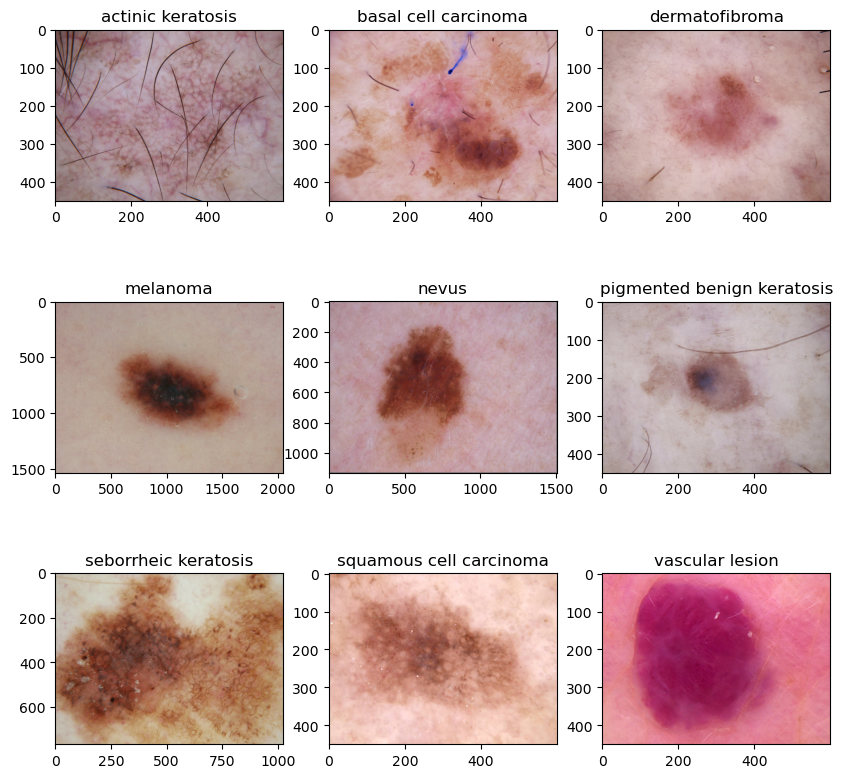

In [10]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [11]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [14]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [16]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 84s 1s/step - loss: 2.0420 - accuracy: 0.2299 - val_loss: 1.8992 - val_accuracy: 0.2908
Epoch 2/25
56/56 [==============================] - 72s 1s/step - loss: 1.7965 - accuracy: 0.3326 - val_loss: 1.6391 - val_accuracy: 0.3870
Epoch 3/25
56/56 [==============================] - 72s 1s/step - loss: 1.6550 - accuracy: 0.3990 - val_loss: 1.6183 - val_accuracy: 0.4564
Epoch 4/25
56/56 [==============================] - 78s 1s/step - loss: 1.5641 - accuracy: 0.4358 - val_loss: 1.5179 - val_accuracy: 0.4698
Epoch 5/25
56/56 [==============================] - 77s 1s/step - loss: 1.4943 - accuracy: 0.4665 - val_loss: 1.5419 - val_accuracy: 0.4631
Epoch 6/25
56/56 [==============================] - 76s 1s/step - loss: 1.4095 - accuracy: 0.5056 - val_loss: 1.6909 - val_accuracy: 0.4228
Epoch 7/25
56/56 [==============================] - 76s 1s/step - loss: 1.3884 - accuracy: 0.5128 - val_loss: 1.3931 - val_accuracy: 0.5280
Epoch 8/25
56/56 [==

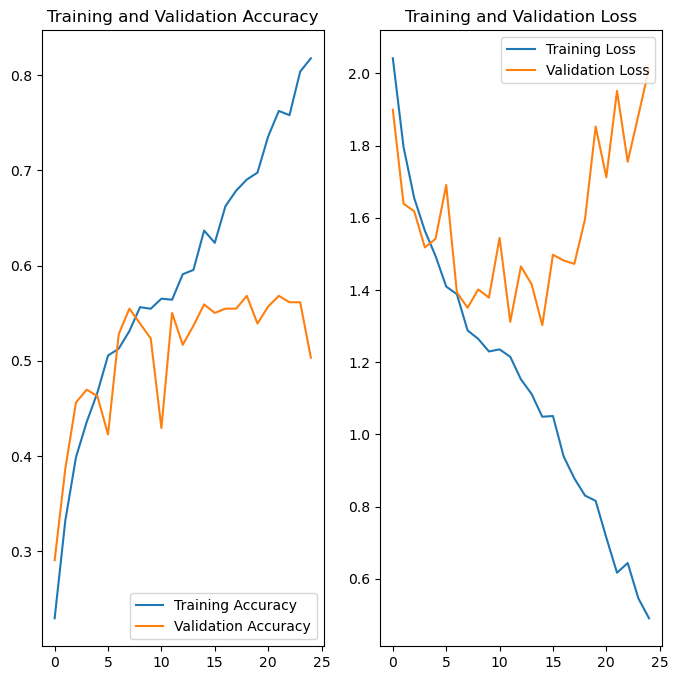

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings :

The model is overfitting because we can see the difference in accuracy in training data & accuracy in the validation data that is almost 20%.

The training accuracy is just around 70-75% with 25 epochos and the model is yet to learn the many features.

data imbalance might be causing the bais to the model.

# Model 2 : Data Augumentation with drop out layer.

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

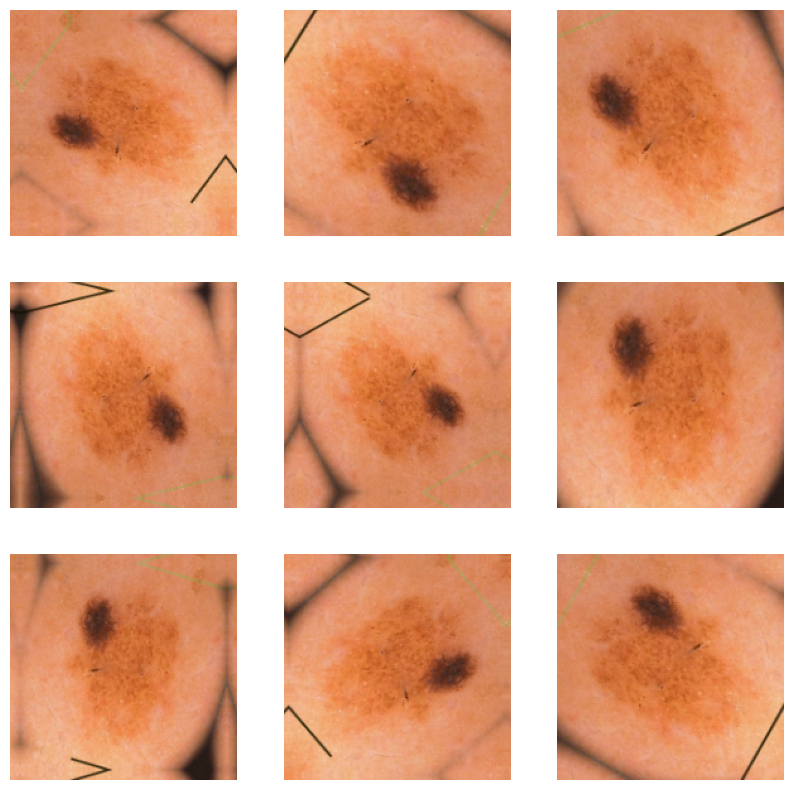

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
num_classes = 9
model = Sequential(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [22]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 79s 1s/step - loss: 2.0765 - accuracy: 0.1819 - val_loss: 2.0138 - val_accuracy: 0.1924
Epoch 2/25
56/56 [==============================] - 72s 1s/step - loss: 1.9519 - accuracy: 0.2511 - val_loss: 1.9813 - val_accuracy: 0.2349
Epoch 3/25
56/56 [==============================] - 67s 1s/step - loss: 1.8837 - accuracy: 0.2701 - val_loss: 1.8114 - val_accuracy: 0.3087
Epoch 4/25
56/56 [==============================] - 68s 1s/step - loss: 1.7833 - accuracy: 0.3320 - val_loss: 1.6859 - val_accuracy: 0.3714
Epoch 5/25
56/56 [==============================] - 69s 1s/step - loss: 1.7304 - accuracy: 0.3644 - val_loss: 1.6433 - val_accuracy: 0.4183
Epoch 6/25
56/56 [==============================] - 68s 1s/step - loss: 1.5401 - accuracy: 0.4559 - val_loss: 1.4858 - val_accuracy: 0.4944
Epoch 7/25
56/56 [==============================] - 70s 1s/step - loss: 1.4666 - accuracy: 0.4794 - val_loss: 1.4500 - val_accuracy: 0.4989
Epoch 8/25
56/56 [==

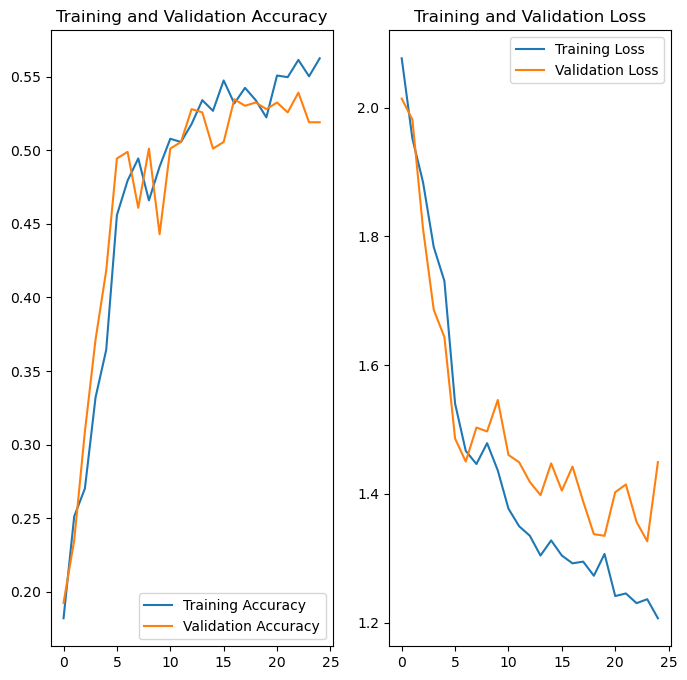

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings:
    
With data agumenatation and drop layer, the overfitting of the model is adressed to great extend. Earlier the train and validation accuracy difference was nearly 20%, with latest approach it's reduced to 2-3%.

The accuracy of the model is compromised heavily and decreased by fair bit from previous venilla model.

Considering above 2 points, there is still a scope of lot of improvement of the model.

# Augmentor : Class balance

In [25]:
import os
output_directory = os.getcwd() + '/augmented_images/'

In [28]:
# List all directories (classes) in the data directory
class_names = os.listdir(data_dir_train)

# Iterate through each class and count the number of images
for class_name in class_names:
    class_path = os.path.join(data_dir_train, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_images = len(os.listdir(class_path))
        print(f'Class: {class_name}, Number of Images: {num_images}')

Class: actinic keratosis, Number of Images: 114
Class: basal cell carcinoma, Number of Images: 376
Class: dermatofibroma, Number of Images: 95
Class: melanoma, Number of Images: 438
Class: nevus, Number of Images: 357
Class: pigmented benign keratosis, Number of Images: 462
Class: seborrheic keratosis, Number of Images: 77
Class: squamous cell carcinoma, Number of Images: 181
Class: vascular lesion, Number of Images: 139


In [30]:
import Augmentor
import os
import pathlib

# Define the path to the training dataset
path_to_training_dataset = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
output_directory = os.getcwd() + '/data/'

# Convert class_names to a list if it's not already
class_names = list(class_names)

# Iterate through each class and create Augmentor pipeline
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i), output_directory=str(output_directory + i + '/output/'))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)


Initialised with 114 image(s) found.
Output directory set to C:\Users\Sakshi/data/actinic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x297AE142290>: 100%|██████████| 500/500 [00:02<00:00, 196.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:\Users\Sakshi/data/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x298C01D7610>: 100%|██████████| 500/500 [00:02<00:00, 197.00 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\Sakshi/data/dermatofibroma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2983A572A10>: 100%|██████████| 500/500 [00:02<00:00, 180.20 Samples/s]


Initialised with 438 image(s) found.
Output directory set to C:\Users\Sakshi/data/melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=722x542 at 0x298C02F2CD0>: 100%|██████████| 500/500 [00:13<00:00, 37.31 Samples/s]  


Initialised with 357 image(s) found.
Output directory set to C:\Users\Sakshi/data/nevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x298C01EB450>: 100%|██████████| 500/500 [00:18<00:00, 26.47 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to C:\Users\Sakshi/data/pigmented benign keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x297AE54F510>: 100%|██████████| 500/500 [00:03<00:00, 126.35 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:\Users\Sakshi/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2983A6D5810>: 100%|██████████| 500/500 [00:08<00:00, 59.91 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\Sakshi/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x298C01D5450>: 100%|██████████| 500/500 [00:04<00:00, 113.43 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\Sakshi/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x297ACC57DD0>: 100%|██████████| 500/500 [00:03<00:00, 125.88 Samples/s]                  


In [33]:
output_dir = pathlib.Path(output_directory)  # Convert output directory to a Path object
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

4500


total training image count = 4500 

-------------------------------------
Class name =  actinic keratosis
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  500
proportion =  0.1111111111111111

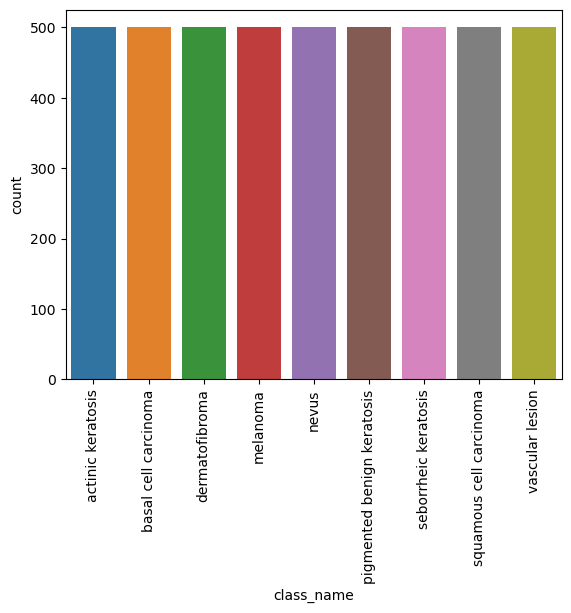

In [34]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

# Model 3 : Model with Class balance data.

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [37]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [38]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [39]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
113/113 [==============================] - 386s 3s/step - loss: 2.2198 - accuracy: 0.1083 - val_loss: 2.1967 - val_accuracy: 0.1211
Epoch 2/25
113/113 [==============================] - 387s 3s/step - loss: 1.9507 - accuracy: 0.2222 - val_loss: 1.6218 - val_accuracy: 0.3656
Epoch 3/25
113/113 [==============================] - 403s 4s/step - loss: 1.6440 - accuracy: 0.3425 - val_loss: 1.4977 - val_accuracy: 0.3811
Epoch 4/25
113/113 [==============================] - 436s 4s/step - loss: 1.5344 - accuracy: 0.3786 - val_loss: 1.4535 - val_accuracy: 0.4211
Epoch 5/25
113/113 [==============================] - 487s 4s/step - loss: 1.4200 - accuracy: 0.4364 - val_loss: 1.3652 - val_accuracy: 0.4600
Epoch 6/25
113/113 [==============================] - 409s 4s/step - loss: 1.3449 - accuracy: 0.4689 - val_loss: 1.2588 - val_accuracy: 0.4800
Epoch 7/25
113/113 [==============================] - 408s 4s/step - loss: 1.3166 - accuracy: 0.4839 - val_loss: 1.2967 - val_accuracy: 0.5044

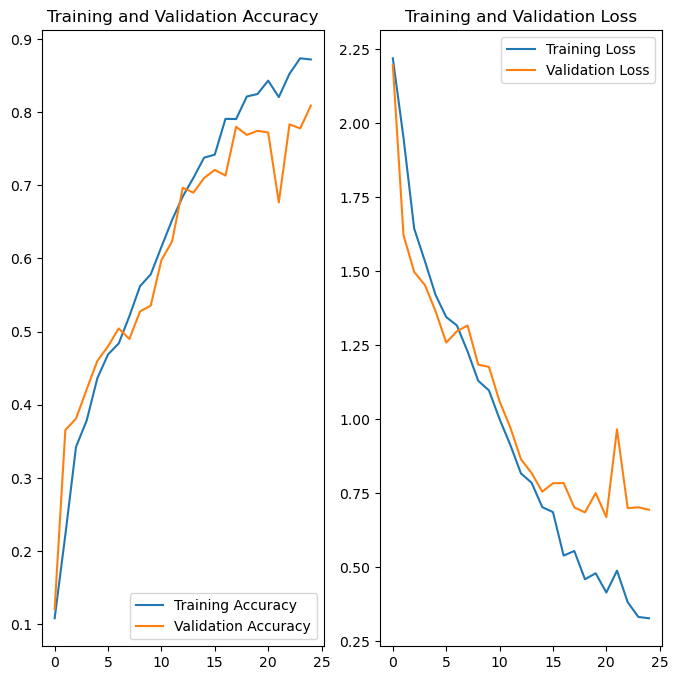

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model : Transefer learning Model

## RESNET50

In [42]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers



In [43]:
resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
    classes=9,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(9, activation='softmax'))

94765736/94765736 [==============================] - 11s 0us/step


In [44]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 9)                 9225      
                                                                 
Total params: 25695113 (98.02 MB)
Trainable params: 2107401 (8.04 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [45]:
# Compile the model
opt = optimizers.Adam(lr=0.001)
resnet_model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

In [46]:
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25
113/113 [==============================] - 374s 3s/step - loss: 0.2713 - accuracy: 0.8950 - val_loss: 0.6301 - val_accuracy: 0.8178
Epoch 2/25
113/113 [==============================] - 377s 3s/step - loss: 0.2975 - accuracy: 0.8897 - val_loss: 0.6390 - val_accuracy: 0.8300
Epoch 3/25
113/113 [==============================] - 380s 3s/step - loss: 0.2553 - accuracy: 0.8961 - val_loss: 0.6394 - val_accuracy: 0.8367
Epoch 4/25
113/113 [==============================] - 425s 4s/step - loss: 0.2547 - accuracy: 0.9039 - val_loss: 0.6855 - val_accuracy: 0.8356
Epoch 5/25
113/113 [==============================] - 411s 4s/step - loss: 0.3058 - accuracy: 0.8864 - val_loss: 0.6679 - val_accuracy: 0.8278
Epoch 6/25
113/113 [==============================] - 371s 3s/step - loss: 0.2489 - accuracy: 0.9081 - val_loss: 0.6941 - val_accuracy: 0.8222
Epoch 7/25
113/113 [==============================] - 507s 4s/step - loss: 0.2339 - accuracy: 0.9158 - val_loss: 0.6238 - val_accuracy: 0.8389

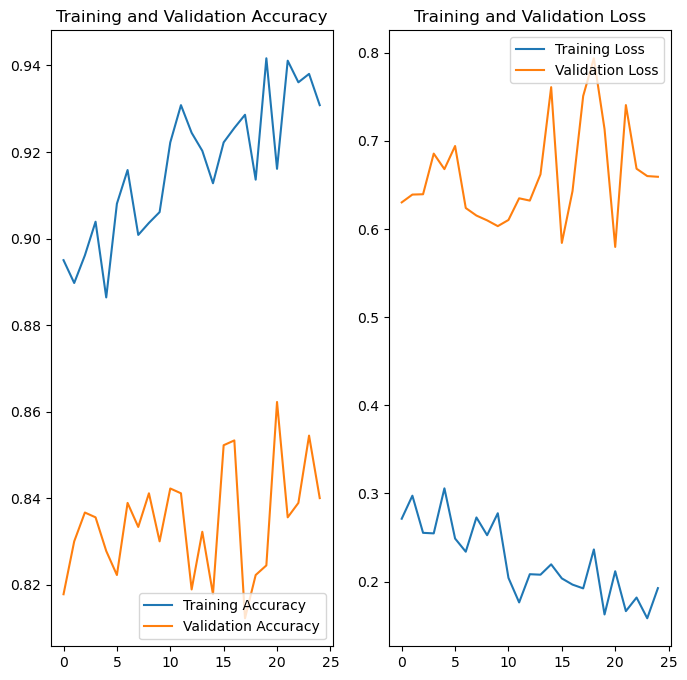

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



1. **Validation Loss Fluctuation:** The validation loss shows some fluctuations across epochs, which might indicate instability in the model's learning process. More stable training could lead to better generalization.

2. **Accuracy Plateau:** The accuracy seems to plateau around 85%, suggesting that the model might have reached its learning capacity or is struggling to improve further. Fine-tuning or adjusting hyperparameters could help address this issue.

In [64]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load and preprocess the image
image_path = r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\ISIC_0000299.jpg'  # Replace with the path to your image
img = load_img(image_path, target_size=(180, 180))  # Adjust target_size based on your model's input shape
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make a prediction using the skin cancer classification model
prediction = resnet_model.predict(img)

# Debugging information
print("Shape of prediction array:", prediction.shape)
print("Prediction array:", prediction)

# Determine the class label based on the prediction
class_labels = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

# Check if the prediction shape matches the number of classes
if prediction.shape[-1] == len(class_labels):
    class_label = class_labels[np.argmax(prediction)]
    print(f"Predicted class: {class_label}")
else:
    print("Number of classes in prediction does not match the number of class labels.")


1/1 [==============================] - 0s 219ms/step
Shape of prediction array: (1, 9)
Prediction array: [[3.9661914e-02 7.5989064e-06 7.2678165e-03 8.5727251e-01 2.1578060e-03
  7.0877140e-05 1.2714311e-03 9.2286319e-02 3.6421754e-06]]
Predicted class: melanoma


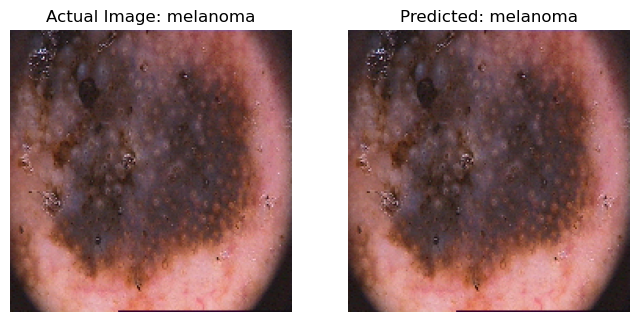

In [67]:
import matplotlib.pyplot as plt

# Load the actual image
actual_img = load_img(image_path, target_size=(180, 180))  # Load the original image

# Plot the actual image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(actual_img)
plt.title(f"Actual Image: {class_label}")
plt.axis('off')

# Plot the predicted image
plt.subplot(1, 2, 2)
plt.imshow(img[0].astype('uint8'))  # Convert to uint8 for imshow
plt.title(f"Predicted: {class_label}")
plt.axis('off')

# Show the plot
plt.show()


In [68]:
model.save("resnet_model_cnn.h5")

## using a dropout layer 

In [76]:
new_resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
    classes=9,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable=False
new_resnet_model.add(Flatten())

# Add a Dense layer with 1024 units and ReLU activation
new_resnet_model.add(Dense(512, activation='relu'))
new_resnet_model.add(Dropout(0.25))  # 25% dropout rate
# Add the final Dense layer with 9 units (assuming 9 classes) and softmax activation
new_resnet_model.add(Dense(9, activation='softmax'))

new_resnet_model.build((None, 180, 180, 3))


In [77]:
# Compile the model
opt = optimizers.Adam(lr=0.001)
new_resnet_model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

In [78]:
new_resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 97200)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               49766912  
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 9)                 4617      
                                                                 
Total params: 49771529 (189.86 MB)
Trainable params: 49771529 (189.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
113/113 [==============================] - 266s 2s/step - loss: 0.1830 - accuracy: 0.9389 - val_loss: 0.7106 - val_accuracy: 0.8511
Epoch 2/10
113/113 [==============================] - 258s 2s/step - loss: 0.1635 - accuracy: 0.9372 - val_loss: 0.7943 - val_accuracy: 0.8356
Epoch 3/10
113/113 [==============================] - 262s 2s/step - loss: 0.1537 - accuracy: 0.9414 - val_loss: 0.6563 - val_accuracy: 0.8467
Epoch 4/10
113/113 [==============================] - 259s 2s/step - loss: 0.1677 - accuracy: 0.9344 - val_loss: 0.7674 - val_accuracy: 0.8422
Epoch 5/10
113/113 [==============================] - 254s 2s/step - loss: 0.2122 - accuracy: 0.9244 - val_loss: 0.6945 - val_accuracy: 0.8422
Epoch 6/10
113/113 [==============================] - 302s 3s/step - loss: 0.1459 - accuracy: 0.9442 - val_loss: 0.8432 - val_accuracy: 0.8211
Epoch 7/10
113/113 [==============================] - 382s 3s/step - loss: 0.1741 - accuracy: 0.9339 - val_loss: 0.7732 - val_accuracy: 0.8444

### no improvements found 

In [38]:
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os

In [39]:
app = Flask(__name__)

# Define the path to your pre-trained model
model_path = 'resnet_model_cnn.h5'

In [40]:
model = load_model(model_path)

In [42]:
def process_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [44]:
@app.route('/')
def index():
    return render_template(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\templates\index.html')

In [47]:
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'})

    file = request.files['file']
    img_path = f'static/uploads/{file.filename}'
    file.save(img_path)
    
    img_array = process_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]

    result = [{'label': label, 'probability': float(prob)} for (_, label, prob) in decoded_preds]
    return jsonify(result)

if __name__ == '__main__':
        app.run(debug=True)

AssertionError: View function mapping is overwriting an existing endpoint function: predict

In [49]:
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

app = Flask(__name__)

# Define the path to your pre-trained model
model_path = 'resnet_model_cnn.h5'
model = load_model(model_path)

def process_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

@app.route('/')
def index():
     return render_template(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\templates\index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'})

    file = request.files['file']
    img_path = f'static/uploads/{file.filename}'
    file.save(img_path)
    
    img_array = process_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]

    result = [{'label': label, 'probability': float(prob)} for (_, label, prob) in decoded_preds]
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [52]:
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np

# Keras
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
from keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH = 'resnet_model_cnn.h5'

# Load your trained model
model = load_model(MODEL_PATH)
model._make_predict_function()          # Necessary
# print('Model loaded. Start serving...')

# You can also use pretrained model from Keras
# Check https://keras.io/applications/
#from keras.applications.resnet50 import ResNet50
#model = ResNet50(weights='imagenet')
#model.save('')
print('Model loaded. Check http://127.0.0.1:5000/')


def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    x = np.expand_dims(x, axis=0)

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x, mode='caffe')

    preds = model.predict(x)
    return preds


@app.route('/', methods=['GET'])
def index():
    # Main page
     return render_template(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\templates\index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path, model)

        # Process your result for human
        # pred_class = preds.argmax(axis=-1)            # Simple argmax
        pred_class = decode_predictions(preds, top=1)   # ImageNet Decode
        result = str(pred_class[0][0][1])               # Convert to string
        return result
    return None


if __name__ == '__main__':
    app.run(debug=True)


AttributeError: 'Sequential' object has no attribute '_make_predict_function'

In [51]:
pip install gevent



  Obtaining dependency information for gevent from https://files.pythonhosted.org/packages/18/b1/bbaf6047b13c4b83cd81007298f4f8ddffd8674c130736423e79e7bb8b6a/gevent-24.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for zope.event from https://files.pythonhosted.org/packages/fe/42/f8dbc2b9ad59e927940325a22d6d3931d630c3644dae7e2369ef5d9ba230/zope.event-5.0-py3-none-any.whl.metadata
  Obtaining dependency information for greenlet>=3.0rc3 from https://files.pythonhosted.org/packages/47/79/26d54d7d700ef65b689fc2665a40846d13e834da0486674a8d4f0f371a47/greenlet-3.0.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - ---------------------